<a href="https://colab.research.google.com/github/abhi-11nav/Car-price-prediction/blob/main/Care_resale_value_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
# Importing libraries 

import pandas as pd
import numpy as np


# Importing visualization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [239]:
# Path of raw data uploaded on github 

dataset_link = "https://raw.githubusercontent.com/abhi-11nav/Car-price-prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv.xls"

In [240]:
# Data stored in a variable

dataset = pd.read_csv(dataset_link)

In [241]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [242]:
# Checking for null values in the dataset

dataset.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

There are no null values. We are good to proceed with the dataset

In [243]:
# Let us check for distinct values in the name feature since it appears to be filled with distinct values

(len(dataset.name.value_counts())/dataset.shape[0])*100

34.35483870967742

There are approximately 35% unique values present in the dataset. So, let us eliminate the feature

In [244]:
# Dropping the "name" feature 

dataset.drop('name',axis=1,inplace=True)

In [245]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


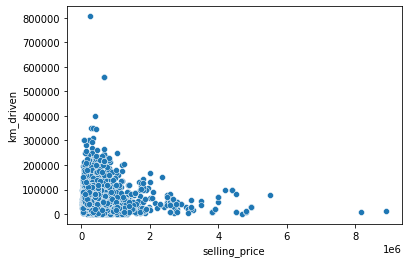

In [246]:
# Checking the realtion between km_driven and sellin_price

sns.scatterplot(dataset['selling_price'], dataset['km_driven'])

Well, it seems to have a linear relation. 

# DO PEARSON R FOR CORREALTION

In [247]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


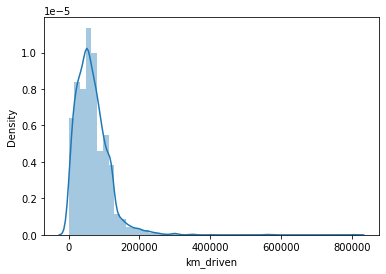

In [248]:
sns.distplot(dataset['km_driven'])

The data is skewed to the right

In [249]:
# Creating a new columns that will be defined by a column already present in the dataset

dataset['car_age'] = 2022 - dataset['year']

# Dropping the year feature 

dataset.drop("year", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


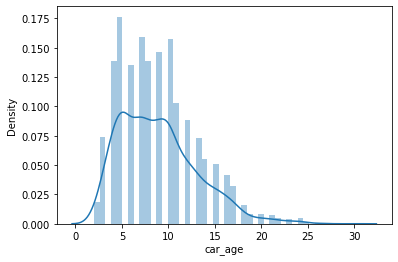

In [250]:
# Distribution of age varibale 

sns.distplot(dataset['car_age'])

Well, it's a bit skewed to the right 

In [252]:
"""
# We are going to apply Standard Scaler on km_driven variable to scale it down and bring it to a normal distribution 

val = 0

for data_point in dataset['km_driven']:
  if data_point <= 0:
    val += 1
if val!=0:
  print("The feature has data points that are less than or equal to 0")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset['km_driven'] = scaler.fit_transform(np.array(dataset["km_driven"]).reshape(-1,1))
dataset["car_age"] = scaler.fit_transform(np.array(dataset["car_age"]).reshape(-1,1))"""

'\n# We are going to apply Standard Scaler on km_driven variable to scale it down and bring it to a normal distribution \n\nval = 0\n\nfor data_point in dataset[\'km_driven\']:\n  if data_point <= 0:\n    val += 1\nif val!=0:\n  print("The feature has data points that are less than or equal to 0")\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\ndataset[\'km_driven\'] = scaler.fit_transform(np.array(dataset["km_driven"]).reshape(-1,1))\ndataset["car_age"] = scaler.fit_transform(np.array(dataset["car_age"]).reshape(-1,1))'

In [253]:
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


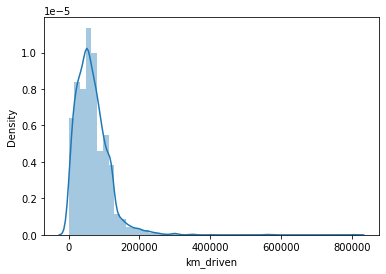

In [254]:
# Checking for distribution again 

sns.distplot(dataset["km_driven"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


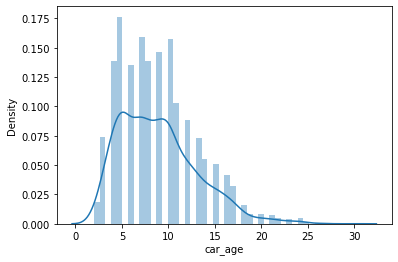

In [255]:
sns.distplot(dataset['car_age'])

The dataset seems to be skewed to the right. Let us check for outliers

In [256]:
# Checking for outliers in the dataset 

from scipy.stats import zscore
z_scores = zscore(dataset['km_driven'])

indexes = []
count = 0

for data in z_scores:
  if (data<-4) or (data>4):
    indexes.append(count)
    count+=1 
  else:
    count+=1

In [258]:
# We are going to drop all the rows in the dataframe that match with index number 

dataset.drop(indexes, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


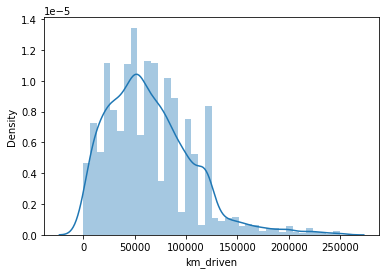

In [259]:
# Checking for the distribution of the data after dropping outliers

sns.distplot(dataset['km_driven'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


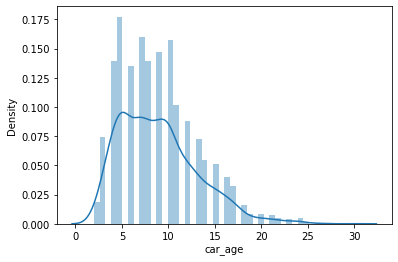

In [260]:
sns.distplot(dataset["car_age"])

Well, it is much better than previous distribution 

In [261]:
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [262]:
#  Now we will have to deal with categorical columns 

for cols in dataset.columns:
  if type(dataset[cols][0]) == str:
    print(dataset[cols].value_counts(),"\n\n")

Diesel      2136
Petrol      2120
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 


Individual          3229
Dealer               989
Trustmark Dealer     102
Name: seller_type, dtype: int64 


Manual       3872
Automatic     448
Name: transmission, dtype: int64 


First Owner             2821
Second Owner            1102
Third Owner              299
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64 




In [263]:
# Perfoming Label encoding on Owner feature 

from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()

dataset['owner'] = Label_encoder.fit_transform(dataset['owner'])

In [264]:
# Removing the row with fuel type as electricity as it is underrepresented

dataset.drop(dataset[dataset['fuel']=="Electric"].index, axis=0, inplace=True)

In [286]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [287]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)

In [288]:
# Seperating the features and labels

X = dataset.drop('selling_price',axis=1)

y = dataset['selling_price']

In [289]:
# Let us one-hot encode the categorical data 

X = pd.get_dummies(X, drop_first=True)

In [290]:
X.head()

,km_driven,owner,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.123723,-0.664352,1.450794,-0.989176,-0.07317,1.018462,0.581004,-0.155524,0.339771
1,-0.359291,-0.664352,1.450794,-0.989176,-0.07317,1.018462,0.581004,-0.155524,0.339771
2,0.848244,-0.664352,0.263246,1.010942,-0.07317,-0.981873,0.581004,-0.155524,0.339771
3,-0.455894,-0.664352,-0.924303,-0.989176,-0.07317,1.018462,0.581004,-0.155524,0.339771
4,1.838423,0.961335,-0.211774,1.010942,-0.07317,-0.981873,0.581004,-0.155524,0.339771


In [291]:
y

0      -0.767831
1      -0.638433
2       0.163833
3      -0.440023
4      -0.094963
          ...   
4314   -0.163977
4315   -0.163977
4316   -0.681566
4317    0.621039
4318   -0.483156
Name: selling_price, Length: 4319, dtype: float64

In [342]:
# Since we are going to train the data on Random Forest Regressor, we do not have to scale/normalize it. 

# Splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.23)

In [343]:
# BUILING THE MODEL 

# Importing necessary libraries

import sklearn 

from sklearn.ensemble import RandomForestRegressor

In [344]:
rf_model  = RandomForestRegressor() 

In [346]:
# Importing library to perform hyper-parameter tuning 

from sklearn.model_selection import RandomizedSearchCV

In [384]:
params = {
    'n_estimators':[int(x) for x in np.linspace(100,1500,10)],
    'criterion':['squared_error', 'absolute_error'],
    'max_depth' : [int(x) for x in np.linspace(10,200,10)],
    'min_samples_split':[2,5,10,20,25,30,50,80],
    'min_samples_leaf':[2,3,4,5,6,7,8]
}

In [385]:
hyper_model = RandomizedSearchCV(estimator = rf_model, param_distributions = params, n_jobs=1, verbose=2, cv=5, n_iter=10, scoring="neg_mean_squared_error", random_state=22)

In [386]:
hyper_model.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=absolute_error, max_depth=200, min_samples_leaf=8, min_samples_split=2, n_estimators=877; total time=  49.3s
[CV] END criterion=absolute_error, max_depth=200, min_samples_leaf=8, min_samples_split=2, n_estimators=877; total time=  47.2s
[CV] END criterion=absolute_error, max_depth=200, min_samples_leaf=8, min_samples_split=2, n_estimators=877; total time=  47.0s
[CV] END criterion=absolute_error, max_depth=200, min_samples_leaf=8, min_samples_split=2, n_estimators=877; total time=  47.1s
[CV] END criterion=absolute_error, max_depth=200, min_samples_leaf=8, min_samples_split=2, n_estimators=877; total time=  47.5s
[CV] END criterion=absolute_error, max_depth=31, min_samples_leaf=3, min_samples_split=20, n_estimators=1033; total time=  58.7s
[CV] END criterion=absolute_error, max_depth=31, min_samples_leaf=3, min_samples_split=20, n_estimators=1033; total time=  59.8s
[CV] END criterion=absolute_error, max_de

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 5, 10, 20, 25,
                                                              30, 50, 80],
                                        'n_estimators': [100, 255, 411, 566,
                                                         722, 877, 1033, 1188,
                                                         1344, 1500]},
                   random_state=22, scoring='neg_mean_squared_error',
                   verbose=2)

In [388]:
hyper_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 178,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1188}

In [390]:
final_model = hyper_model.best_estimator_

In [391]:
from sklearn.metrics import mean_squared_error

In [392]:
mean_squared_error(test_y, final_model.predict(test_X))

0.23981700218838084

In [394]:
# Importing library to save the model 

import pickle 

In [396]:
pickle.dump(final_model,open("model.pkl","wb"))